In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords 
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [3]:
airline_data = pd.read_csv("Airline.csv")
pd.set_option('display.max_colwidth', None)


In [4]:
display(airline_data.head(5))

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [5]:
print(f"This Airline Dataset contains {airline_data.shape[0]} rows and {airline_data.shape[1]} columns")


This Airline Dataset contains 14640 rows and 20 columns


In [6]:
# get only airline , text, airline sentiment , confidence columns in data
tweet_data = airline_data[["airline","text","airline_sentiment","airline_sentiment:confidence"]]
tweet_data['length'] = tweet_data['text'].apply(len)
tweet_data.sample()

,airline,text,airline_sentiment,airline_sentiment:confidence,length
13864,American,@AmericanAir @SouljaCoy what is AA going to do to fix their utterly embarrassing customer service? You won't even answer the dang phone!,negative,1.0,136


In [7]:
tweet_data.describe()

,airline_sentiment:confidence,length
count,14640.000000,14640.000000
mean,0.900169,104.118511
std,0.162830,36.256550
min,0.335000,12.000000
25%,0.692300,77.000000
50%,1.000000,115.000000
75%,1.000000,136.000000
max,1.000000,229.000000


In [8]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline                       14640 non-null  object 
 1   text                          14640 non-null  object 
 2   airline_sentiment             14640 non-null  object 
 3   airline_sentiment:confidence  14640 non-null  float64
 4   length                        14640 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 572.0+ KB


In [9]:
tweet_data.describe()

,airline_sentiment:confidence,length
count,14640.000000,14640.000000
mean,0.900169,104.118511
std,0.162830,36.256550
min,0.335000,12.000000
25%,0.692300,77.000000
50%,1.000000,115.000000
75%,1.000000,136.000000
max,1.000000,229.000000


<Axes: title={'center': 'Heatmap of Tweet_data'}>

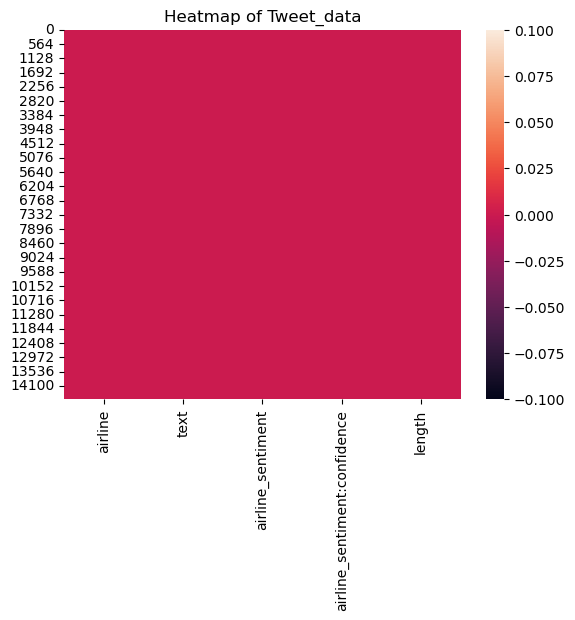

In [10]:
plt.title("Heatmap of Tweet_data")
sns.heatmap(tweet_data.isnull())

<Axes: ylabel='Frequency'>

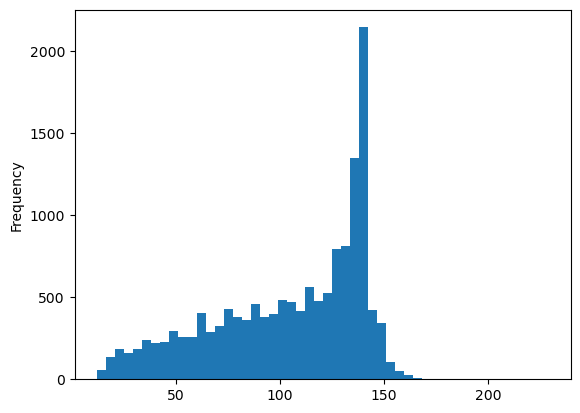

In [11]:
tweet_data['length'].plot(kind='hist',bins=50)

In [12]:
def remove_punctuations(text):
    new_string = "".join([letter for letter in text if letter not in string.punctuation])
    return new_string
def remove_stopwords(text):
    new_string = " ".join([word for word in text.split() if word.lower() not in stopwords.words("english")])
    return new_string
def clean_text(text):
    encoded_text = text.encode('ascii', 'ignore')
    decoded_text = encoded_text.decode()
    new_string1 = remove_punctuations(decoded_text)
    cleaned_text = remove_stopwords(new_string1)
    return cleaned_text

In [13]:
tweet_data['cleaned_text'] = tweet_data['text'].apply(clean_text)

In [14]:
tweet_data.sample(1)

,airline,text,airline_sentiment,airline_sentiment:confidence,length,cleaned_text
573,United,@united ZCC82U Cancelled Flight flight 16h in advance??? Need connect flight reschedule so the link isn't helping. Help!? Gf waited months to see me.,negative,1.0,149,united ZCC82U Cancelled Flight flight 16h advance Need connect flight reschedule link isnt helping Help Gf waited months see


In [15]:
tweet_data['airline_sentiment']=tweet_data['airline_sentiment'].replace(["negative","positive","neutral"],[0,2,1])

In [16]:
tweet_data

,airline,text,airline_sentiment,airline_sentiment:confidence,length,cleaned_text
0,Virgin America,@VirginAmerica What @dhepburn said.,1,1.0000,35,VirginAmerica dhepburn said
1,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.,2,0.3486,72,VirginAmerica plus youve added commercials experience tacky
2,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!,1,0.6837,71,VirginAmerica didnt today Must mean need take another trip
3,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0,1.0000,126,VirginAmerica really aggressive blast obnoxious entertainment guests faces amp little recourse
4,Virgin America,@VirginAmerica and it's a really big bad thing about it,0,1.0000,55,VirginAmerica really big bad thing
...,...,...,...,...,...,...
14635,American,@AmericanAir thank you we got on a different flight to Chicago.,2,0.3487,63,AmericanAir thank got different flight Chicago
14636,American,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,0,1.0000,150,AmericanAir leaving 20 minutes Late Flight warnings communication 15 minutes Late Flight Thats called shitty customer svc
14637,American,@AmericanAir Please bring American Airlines to #BlackBerry10,1,1.0000,60,AmericanAir Please bring American Airlines BlackBerry10
14638,American,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",0,1.0000,135,AmericanAir money change flight dont answer phones suggestions make commitment


In [32]:
neagtive_text = "".join(tweet_data[tweet_data['airline_sentiment']==0]['cleaned_text'])
neutral_text = "".join(tweet_data[tweet_data['airline_sentiment']==1]['cleaned_text'])
positive_text = "".join(tweet_data[tweet_data['airline_sentiment']==2]['cleaned_text'])

<Axes: ylabel='Frequency'>

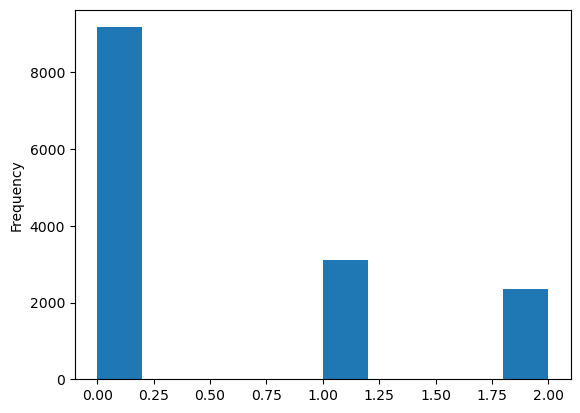

In [37]:
tweet_data['airline_sentiment'].plot(kind="hist",bins=10)

<b>Neutral = 1
   Positive = 2
   negative = 0
</b>
   

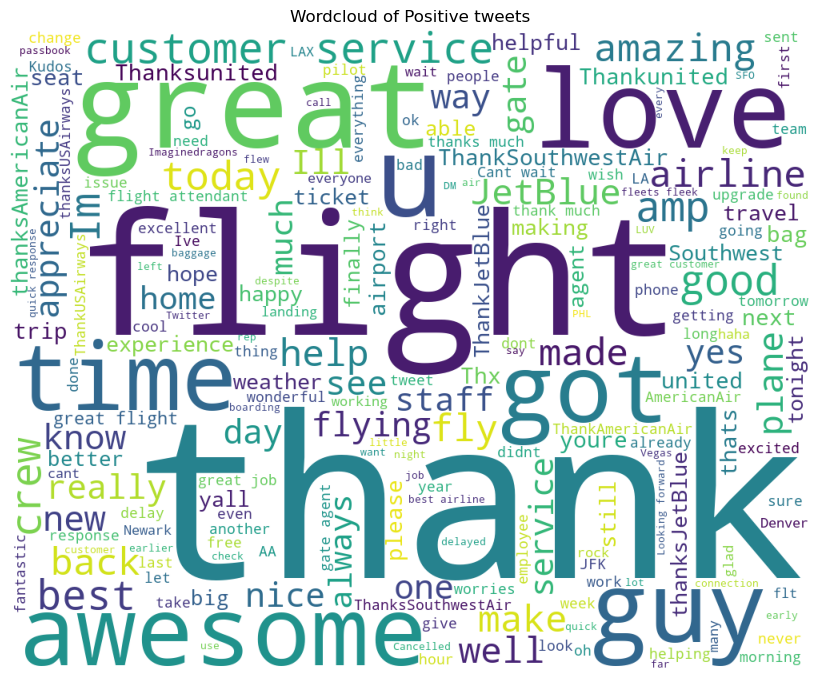

In [36]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 800,
                background_color ='white',
                min_font_size = 10).generate(positive_text)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Wordcloud of Positive tweets")
plt.show()

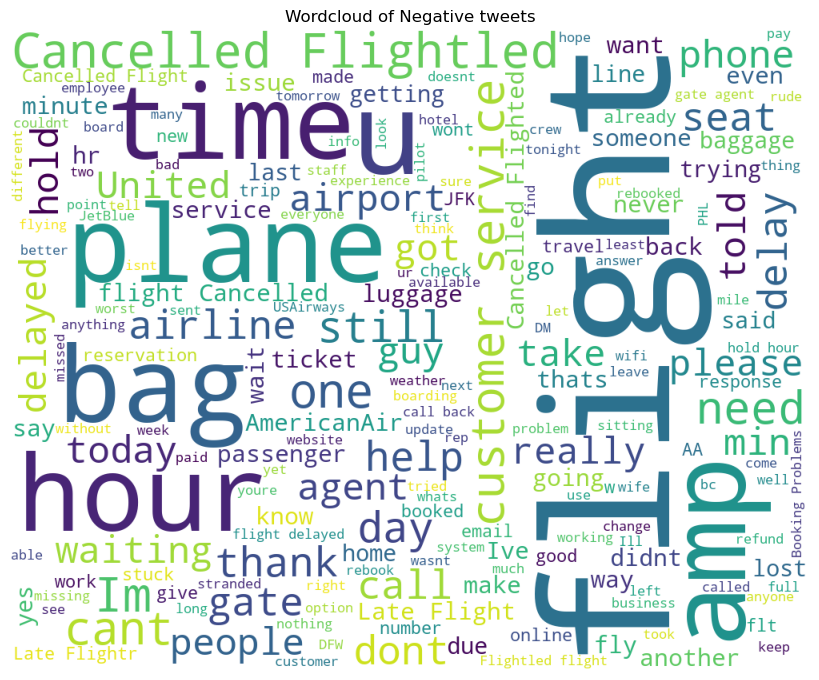

In [34]:
wordcloud = WordCloud(width = 1000, height = 800,
                background_color ='white',
                min_font_size = 10).generate(neagtive_text)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Wordcloud of Negative tweets")
plt.show()

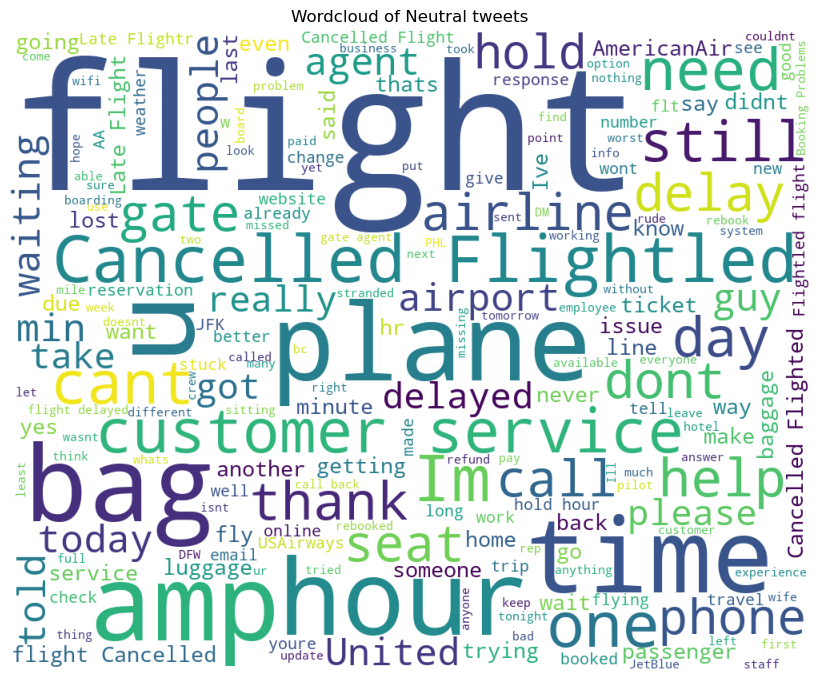

In [35]:
wordcloud = WordCloud(width = 1000, height = 800,
                background_color ='white',
                min_font_size = 10).generate(neagtive_text)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Wordcloud of Neutral tweets")
plt.show()

## building Model

In [43]:

text_data = list(tweet_data['cleaned_text'])

vectorizer = CountVectorizer()

vectorizer.fit(text_data)

vector = vectorizer.transform(text_data)
Model_data= pd.DataFrame(vector.toarray())

In [74]:
Model_data['sentiment'] = tweet_data['airline_sentiment']
Model_data

,0,1,2,3,4,5,6,7,8,9,...,16522,16523,16524,16525,16526,16527,16528,16529,16530,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
14636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
y = Model_data['sentiment']
X = Model_data.drop('sentiment',axis=1)

In [76]:
X

,0,1,2,3,4,5,6,7,8,9,...,16521,16522,16523,16524,16525,16526,16527,16528,16529,16530
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2) 

In [86]:
Naivebayes_model = MultinomialNB()
Naivebayes_model.fit(x_train,y_train)

MultinomialNB()

In [88]:
y_pred = Naivebayes_model.predict(x_test) 

In [90]:
confusion_matrix(y_test,y_pred)

array([[1723,   73,   36],
       [ 308,  258,   52],
       [ 181,   42,  255]])

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1832
           1       0.69      0.42      0.52       618
           2       0.74      0.53      0.62       478

    accuracy                           0.76      2928
   macro avg       0.74      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928



In [98]:
from sklearn.ensemble import GradientBoostingClassifier
# Instantiate Gradient Boosting Regressor
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.03,
                                 random_state=100,
                                 max_features=5 )
gbc.fit(x_train,y_train)


GradientBoostingClassifier(learning_rate=0.03, max_features=5, n_estimators=300,
                           random_state=100)

In [99]:
gb_y_pred = gbc.predict(x_test)

In [100]:
print(classification_report(y_test,gb_y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77      1832
           1       0.00      0.00      0.00       618
           2       0.00      0.00      0.00       478

    accuracy                           0.63      2928
   macro avg       0.21      0.33      0.26      2928
weighted avg       0.39      0.63      0.48      2928



In [101]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [102]:
rf_y_predict = rf_classifier.predict(x_test)

In [103]:
print(classification_report(y_test,rf_y_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1832
           1       0.58      0.43      0.49       618
           2       0.67      0.60      0.63       478

    accuracy                           0.75      2928
   macro avg       0.69      0.64      0.66      2928
weighted avg       0.74      0.75      0.74      2928



In [106]:
print(classification_report(y_test,rf_y_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1832
           1       0.58      0.43      0.49       618
           2       0.67      0.60      0.63       478

    accuracy                           0.75      2928
   macro avg       0.69      0.64      0.66      2928
weighted avg       0.74      0.75      0.74      2928

